In [1]:
import random
import matplotlib.pyplot as plt

from lib.learn_dt import DT_learner
from lib.learn_problem import Data_set, Data_from_file, error_example


class K_fold_dataset(object):
    
    def __init__(self, training_set, num_folds):
        self.data = training_set.train.copy()
        self.target = training_set.target
        self.input_features = training_set.input_features
        self.num_folds = num_folds
        random.shuffle(self.data)
        self.fold_boundaries = [
            (len(self.data) * i) // num_folds for i in range(0, num_folds + 1)
        ]

    def fold(self, fold_num):
        for i in range(
            self.fold_boundaries[fold_num],
            self.fold_boundaries[fold_num + 1]
        ):
            yield self.data[i]

    def fold_complement(self, fold_num):
        for i in range(0, self.fold_boundaries[fold_num]):
            yield self.data[i]
        for i in range(self.fold_boundaries[fold_num + 1], len(self.data)):
            yield self.data[i]

    def validation_error(self, learner, criterion, **other_params):
        error = 0
        try:
            for i in range(self.num_folds):
                predictor = learner(
                    self,
                    train=list(self.fold_complement(i)),
                    **other_params
                ).learn()
                error += sum(
                    error_example(
                        predictor(example),
                        self.target(example),
                        criterion
                    ) for example in self.fold(i)
                )
        except ValueError:
            return float('inf')  # infinity
        return error / len(self.data)


In [2]:
def plot_error(data, criterion='sum-of-squares', num_folds=5, xscale='log'):
    """Plots the error on the validation set and the test set 
    with respect to settings of the minimum number of examples.
    xscale should be 'log' or 'linear'
    """
    plt.ion()
    plt.xscale('log')  # change between log and linear scale
    plt.xlabel('minimum number of examples')
    plt.ylabel('average ' + criterion + ' error')
    folded_data = K_fold_dataset(data, num_folds)
    verrors = []   # validation errors
    terrors = []   # test set errors
    for mne in range(1, len(data.train) + 2):
        verrors.append(
            folded_data.validation_error(
                DT_learner,
                criterion,
                min_number_examples=mne
            )
        )
        tree = DT_learner(data, criterion, min_number_examples=mne).learn()
        terrors.append(data.evaluate_dataset(data.test, tree, criterion))
    plt.plot(range(1, len(data.train) + 2), verrors, ls='-',color='k', label='validation for ' + criterion)
    plt.plot(range(1, len(data.train) + 2), terrors, ls='--',color='k', label='test set for ' + criterion)
    plt.legend()
    plt.draw()


Tuples read. 
Training set 21 examples. Number of columns: {5} 
Test set 7 examples. Number of columns: {5}
There are 4 input features
   split on e[0]==1 has err= 3.716666666666667 splits into 12 : 5
   split on e[1]==1 has err= 3.878787878787879 splits into 11 : 6
   split on e[2]==1 has err= 2.4000000000000004 splits into 7 : 10
   split on e[3]==1 has err= 3.7222222222222223 splits into 9 : 8
best split is on e[2]==1 with err= 2.4000000000000004
Splitting on e[2]==1 with examples split 7 : 10
   split on e[0]==1 has err= 1.5833333333333335 splits into 6 : 4
   split on e[1]==1 has err= 2.3333333333333335 splits into 6 : 4
   split on e[3]==1 has err= 2.380952380952381 splits into 7 : 3
best split is on e[0]==1 with err= 1.5833333333333335
Splitting on e[0]==1 with examples split 6 : 4
   split on e[1]==1 has err= 0.8000000000000003 splits into 5 : 1
   split on e[3]==1 has err= 0.75 splits into 4 : 2
best split is on e[3]==1 with err= 0.75
Splitting on e[3]==1 with examples split 4

   split on e[1]==1 has err= 0.75 splits into 4 : 1
   split on e[3]==1 has err= 0.75 splits into 4 : 1
best split is on e[1]==1 with err= 0.75
Splitting on e[1]==1 with examples split 4 : 1
best split is on None with err= 0.75
   split on e[0]==1 has err= 2.9333333333333336 splits into 10 : 6
   split on e[1]==1 has err= 2.857142857142857 splits into 9 : 7
   split on e[2]==1 has err= 1.714285714285714 splits into 9 : 7
   split on e[3]==1 has err= 2.984126984126984 splits into 7 : 9
best split is on e[2]==1 with err= 1.714285714285714
Splitting on e[2]==1 with examples split 9 : 7
   split on e[0]==1 has err= 1.6666666666666667 splits into 3 : 4
   split on e[1]==1 has err= 1.7000000000000002 splits into 5 : 2
   split on e[3]==1 has err= 1.2000000000000002 splits into 5 : 2
best split is on e[3]==1 with err= 1.2000000000000002
Splitting on e[3]==1 with examples split 5 : 2
   split on e[0]==1 has err= 1.1666666666666667 splits into 2 : 3
   split on e[1]==1 has err= 1.16666666666666

   split on e[1]==1 has err= 2.3333333333333335 splits into 6 : 4
   split on e[3]==1 has err= 2.380952380952381 splits into 7 : 3
best split is on e[0]==1 with err= 1.5833333333333335
Splitting on e[0]==1 with examples split 6 : 4
   split on e[0]==1 has err= 4.0606060606060606 splits into 11 : 6
   split on e[1]==1 has err= 3.7222222222222223 splits into 9 : 8
   split on e[2]==1 has err= 1.5555555555555556 splits into 8 : 9
   split on e[3]==1 has err= 4.0 splits into 8 : 9
best split is on e[2]==1 with err= 1.5555555555555556
Splitting on e[2]==1 with examples split 8 : 9
   split on e[0]==1 has err= 1.0 splits into 5 : 4
   split on e[1]==1 has err= 1.5000000000000002 splits into 6 : 3
   split on e[3]==1 has err= 1.5500000000000003 splits into 5 : 4
best split is on e[0]==1 with err= 1.0
Splitting on e[0]==1 with examples split 5 : 4
   split on e[0]==1 has err= 3.878787878787879 splits into 11 : 6
   split on e[1]==1 has err= 3.7222222222222223 splits into 9 : 8
   split on e[2]

   split on e[0]==1 has err= 3.466666666666667 splits into 12 : 5
   split on e[1]==1 has err= 3.257142857142857 splits into 10 : 7
   split on e[2]==1 has err= 1.875 splits into 9 : 8
   split on e[3]==1 has err= 3.314285714285715 splits into 7 : 10
best split is on e[2]==1 with err= 1.875
Splitting on e[2]==1 with examples split 9 : 8
   split on e[0]==1 has err= 4.642857142857143 splits into 14 : 7
   split on e[1]==1 has err= 4.472222222222223 splits into 12 : 9
   split on e[2]==1 has err= 2.545454545454546 splits into 10 : 11
   split on e[3]==1 has err= 4.581818181818182 splits into 10 : 11
best split is on e[2]==1 with err= 2.545454545454546
Splitting on e[2]==1 with examples split 10 : 11
   split on e[0]==1 has err= 4.642857142857143 splits into 14 : 7
   split on e[1]==1 has err= 4.472222222222223 splits into 12 : 9
   split on e[2]==1 has err= 2.545454545454546 splits into 10 : 11
   split on e[3]==1 has err= 4.581818181818182 splits into 10 : 11
best split is on e[2]==1 wi

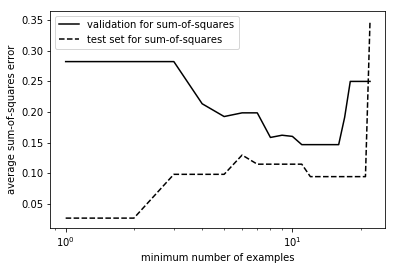

In [3]:
# Try
data = Data_from_file('data/mail_reading.csv', target_index=-1)
# data = Data_from_file('data/SPECT.csv',target_index=0)
# data = Data_from_file('data/carbool.csv', target_index=-1)
# plot_error(data)    # warning, may take a long time depending on the dataset


def plot_fig_7_15():     # different runs produce different plots
    # data = Data_from_file('data/SPECT.csv',target_index=0)
    # data = Data_from_file('data/carbool.csv', target_index=-1)
    plot_error(data)
    
plot_fig_7_15()   # warning takes a long time!
